In [1]:
import numpy as np 
import pandas as pd 
import re
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import re
import nltk
import spacy
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.tokenize import sent_tokenize
from nltk.stem import SnowballStemmer
from string import punctuation
from wordcloud import WordCloud

In [4]:
### Add the path to this file of your computer
reviewsX = pd.read_csv(r'C:\Users\frans\Desktop\Rotten\rotten_tomatoes_critic_reviews.csv')
reviewsX.head(2)

,rotten_tomatoes_link,critic_name,top_critic,publisher_name,review_type,review_score,review_date,review_content
0,m/0814255,Andrew L. Urban,False,Urban Cinefile,Fresh,NaN,2010-02-06,A fantasy adventure that fuses Greek mythology...
1,m/0814255,Louise Keller,False,Urban Cinefile,Fresh,NaN,2010-02-06,"Uma Thurman as Medusa, the gorgon with a coiff..."


In [6]:
### Add the path to this file of your computer
moviesX = pd.read_csv(r'C:\Users\frans\Desktop\Rotten\rotten_tomatoes_movies.csv')
moviesX.head(2)

,rotten_tomatoes_link,movie_title,movie_info,critics_consensus,content_rating,genres,directors,authors,actors,original_release_date,...,production_company,tomatometer_status,tomatometer_rating,tomatometer_count,audience_status,audience_rating,audience_count,tomatometer_top_critics_count,tomatometer_fresh_critics_count,tomatometer_rotten_critics_count
0,m/0814255,Percy Jackson & the Olympians: The Lightning T...,"Always trouble-prone, the life of teenager Per...",Though it may seem like just another Harry Pot...,PG,"Action & Adventure, Comedy, Drama, Science Fic...",Chris Columbus,"Craig Titley, Chris Columbus, Rick Riordan","Logan Lerman, Brandon T. Jackson, Alexandra Da...",2010-02-12,...,20th Century Fox,Rotten,49.0,149.0,Spilled,53.0,254421.0,43,73,76
1,m/0878835,Please Give,Kate (Catherine Keener) and her husband Alex (...,Nicole Holofcener's newest might seem slight i...,R,Comedy,Nicole Holofcener,Nicole Holofcener,"Catherine Keener, Amanda Peet, Oliver Platt, R...",2010-04-30,...,Sony Pictures Classics,Certified-Fresh,87.0,142.0,Upright,64.0,11574.0,44,123,19


In [7]:
### Save to pickle
reviewsX.to_pickle("pickles/reviews_p.pkl")
reviews = pd.read_pickle("pickles/reviews_p.pkl")

moviesX.to_pickle("pickles/movies_p.pkl")
movies = pd.read_pickle("pickles/movies_p.pkl")
movies.head(2)

,rotten_tomatoes_link,movie_title,movie_info,critics_consensus,content_rating,genres,directors,authors,actors,original_release_date,...,production_company,tomatometer_status,tomatometer_rating,tomatometer_count,audience_status,audience_rating,audience_count,tomatometer_top_critics_count,tomatometer_fresh_critics_count,tomatometer_rotten_critics_count
0,m/0814255,Percy Jackson & the Olympians: The Lightning T...,"Always trouble-prone, the life of teenager Per...",Though it may seem like just another Harry Pot...,PG,"Action & Adventure, Comedy, Drama, Science Fic...",Chris Columbus,"Craig Titley, Chris Columbus, Rick Riordan","Logan Lerman, Brandon T. Jackson, Alexandra Da...",2010-02-12,...,20th Century Fox,Rotten,49.0,149.0,Spilled,53.0,254421.0,43,73,76
1,m/0878835,Please Give,Kate (Catherine Keener) and her husband Alex (...,Nicole Holofcener's newest might seem slight i...,R,Comedy,Nicole Holofcener,Nicole Holofcener,"Catherine Keener, Amanda Peet, Oliver Platt, R...",2010-04-30,...,Sony Pictures Classics,Certified-Fresh,87.0,142.0,Upright,64.0,11574.0,44,123,19


In [59]:
### Run
reviews = pd.read_pickle("reviews_p.pkl")
reviews.head(2)

,rotten_tomatoes_link,critic_name,top_critic,publisher_name,review_type,review_score,review_date,review_content
0,m/0814255,Andrew L. Urban,False,Urban Cinefile,Fresh,NaN,2010-02-06,A fantasy adventure that fuses Greek mythology...
1,m/0814255,Louise Keller,False,Urban Cinefile,Fresh,NaN,2010-02-06,"Uma Thurman as Medusa, the gorgon with a coiff..."


In [56]:
### Run
movies = pd.read_pickle("movies_p.pkl")
movies.head(2)

,rotten_tomatoes_link,movie_title,movie_info,critics_consensus,content_rating,genres,directors,authors,actors,original_release_date,...,tomatometer_rating,tomatometer_count,audience_status,audience_rating,audience_count,tomatometer_top_critics_count,tomatometer_fresh_critics_count,tomatometer_rotten_critics_count,genre,first_genre
0,m/0814255,Percy Jackson & the Olympians: The Lightning T...,"Always trouble-prone, the life of teenager Per...",Though it may seem like just another Harry Pot...,PG,"Action & Adventure, Comedy, Drama, Science Fic...",Chris Columbus,"Craig Titley, Chris Columbus, Rick Riordan","Logan Lerman, Brandon T. Jackson, Alexandra Da...",2010-02-12,...,49.0,149.0,Spilled,53.0,254421.0,43,73,76,"[Action & Adventure, Comedy, Drama, Science...",Action & Adventure
1,m/0878835,Please Give,Kate (Catherine Keener) and her husband Alex (...,Nicole Holofcener's newest might seem slight i...,R,Comedy,Nicole Holofcener,Nicole Holofcener,"Catherine Keener, Amanda Peet, Oliver Platt, R...",2010-04-30,...,87.0,142.0,Upright,64.0,11574.0,44,123,19,[Comedy],Comedy


<Figure size 2000x1500 with 0 Axes>

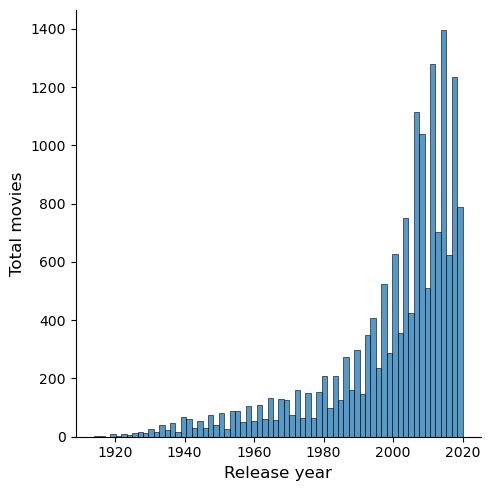

In [27]:
### Movies by year 
pd.options.mode.chained_assignment = None # solution to error "A value is trying to be set on a copy of a slice from a DataFrame". 
movies01 = movies[movies.original_release_date.notnull()]
movies01.original_release_date = pd.to_datetime(movies01.original_release_date)
movies01['year'] = movies01['original_release_date'].apply(lambda x: x.year) # in this way we only have the year

# Do the plot
plt.figure(figsize=(20,15))
sns.displot(movies01.year, kde=False)
plt.ylabel('Total movies', size= 12)
plt.xlabel('Release year',size= 12)
plt.savefig('Years.png', bbox_inches = "tight")

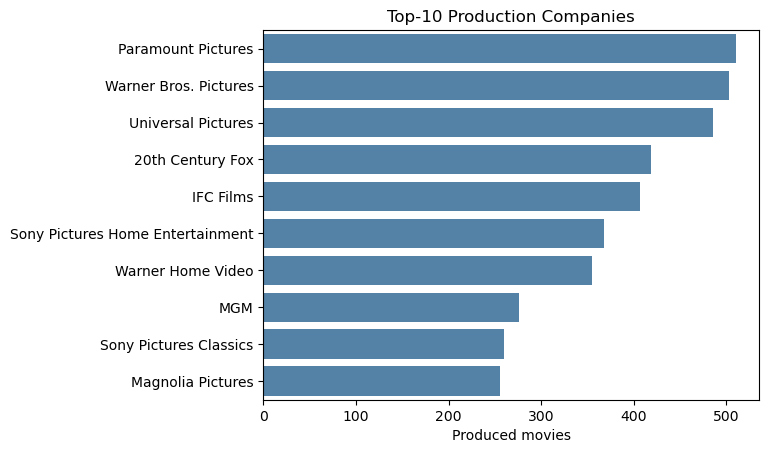

In [28]:
### Top-10 Production Companies 

# Filter the df for the plot
count_of_PC = movies01.production_company.value_counts()[:10] #We only want the top 10 for this graph

# Create the plot
sns.barplot(x = count_of_PC.values, y = count_of_PC.index, color = 'steelblue')
plt.title('Top-10 Production Companies')
plt.xlabel('Produced movies')
plt.savefig('ProductionCo.png', bbox_inches = "tight")

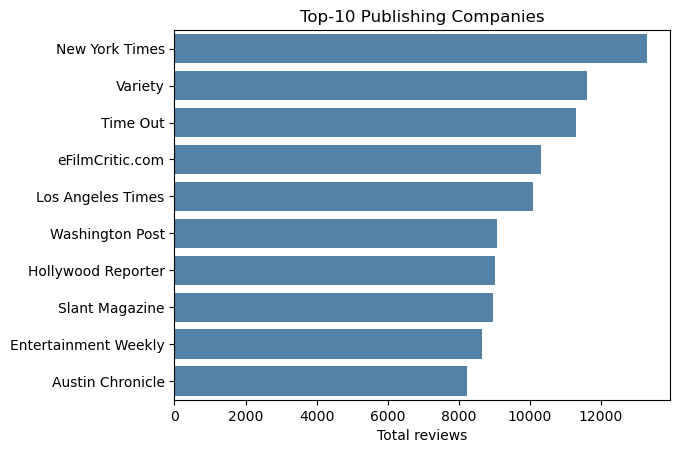

In [29]:
### Top-10 Publisher Names

# Filter the df for the plot
count_of_PN = reviews['publisher_name'].value_counts()[:10]

# Create the plot
sns.barplot(x = count_of_PN.values, y = count_of_PN.index, color = 'steelblue' )
plt.title("Top-10 Publishing Companies")
plt.xlabel("Total reviews")
plt.savefig('publishers.png',bbox_inches = "tight")

In [30]:
movies['genre'] = movies['genres'].str.split(',')

movies_split = movies.explode("genre")
movies_split.head(2)

,rotten_tomatoes_link,movie_title,movie_info,critics_consensus,content_rating,genres,directors,authors,actors,original_release_date,...,tomatometer_status,tomatometer_rating,tomatometer_count,audience_status,audience_rating,audience_count,tomatometer_top_critics_count,tomatometer_fresh_critics_count,tomatometer_rotten_critics_count,genre
0,m/0814255,Percy Jackson & the Olympians: The Lightning T...,"Always trouble-prone, the life of teenager Per...",Though it may seem like just another Harry Pot...,PG,"Action & Adventure, Comedy, Drama, Science Fic...",Chris Columbus,"Craig Titley, Chris Columbus, Rick Riordan","Logan Lerman, Brandon T. Jackson, Alexandra Da...",2010-02-12,...,Rotten,49.0,149.0,Spilled,53.0,254421.0,43,73,76,Action & Adventure
0,m/0814255,Percy Jackson & the Olympians: The Lightning T...,"Always trouble-prone, the life of teenager Per...",Though it may seem like just another Harry Pot...,PG,"Action & Adventure, Comedy, Drama, Science Fic...",Chris Columbus,"Craig Titley, Chris Columbus, Rick Riordan","Logan Lerman, Brandon T. Jackson, Alexandra Da...",2010-02-12,...,Rotten,49.0,149.0,Spilled,53.0,254421.0,43,73,76,Comedy


In [31]:
### Rating Fix

movies['first_genre'] = movies['genres'].str.split(',').str[0]
def cleaning_review_scores(x):
    x = re.sub(' +', '', x)
    if '/' in x: # rating is numeric, but need to transform it in score out of 10
        numer = float(x[:x.index('/')])
        denom = float(x[x.index('/')+1:])
        if (denom >= numer) and (denom > 0):
            return round(numer * (10 / denom), 2)
        else:
            return np.nan
    else: # rating is non-numeric
        if x == 'A':
            return 10
        elif x == 'A-':
            return 9.25
        elif x == 'B+':
            return 8.25
        elif x == 'B':
            return 7.5
        elif x == 'B-':
            return 6.75
        elif x == 'C+':
            return 5.75
        elif x == 'C':
            return 5
        elif x == 'C-':
            return 4.25
        elif x == 'D+':
            return 3.25
        elif x == 'D':
            return 2.5
        elif x == 'D-':
            return 1.75
        elif x == 'F':
            return 0
review_ok = reviews[(reviews.review_score.notnull()) & (reviews.review_score.str.isnumeric() == False)]
review_ok['review_score'] = review_ok['review_score'].apply(cleaning_review_scores)

review_ok['review_score'] = pd.to_numeric(review_ok['review_score'], errors='coerce')
review_ok = review_ok[(review_ok.review_score.notnull()) & (review_ok.review_content.notnull())]
review_ok['review_date'] = pd.to_datetime(review_ok['review_date'])
review_ok['review_year'] = review_ok['review_date'].apply(lambda x: x.year)

review_ok.insert(1, 'first_genre', review_ok['rotten_tomatoes_link'].map(movies.set_index('rotten_tomatoes_link')['first_genre']))
review_ok.insert(1, 'genres', review_ok['rotten_tomatoes_link'].map(movies.set_index('rotten_tomatoes_link')['genres']))
review_ok.insert(1, 'movie_title', review_ok['rotten_tomatoes_link'].map(movies.set_index('rotten_tomatoes_link')['movie_title']))
review_ok.head(2)

,rotten_tomatoes_link,movie_title,genres,first_genre,critic_name,top_critic,publisher_name,review_type,review_score,review_date,review_content,review_year
3,m/0814255,Percy Jackson & the Olympians: The Lightning T...,"Action & Adventure, Comedy, Drama, Science Fic...",Action & Adventure,Ben McEachen,False,Sunday Mail (Australia),Fresh,7.0,2010-02-09,Whether audiences will get behind The Lightnin...,2010
6,m/0814255,Percy Jackson & the Olympians: The Lightning T...,"Action & Adventure, Comedy, Drama, Science Fic...",Action & Adventure,Nick Schager,False,Slant Magazine,Rotten,2.5,2010-02-10,Harry Potter knockoffs don't come more transpa...,2010


In [32]:
### Save reviews_ok to pickle
review_ok.to_pickle("review_ok_p.pkl")
review_ok = pd.read_pickle("review_ok_p.pkl")
review_ok.head(2)

,rotten_tomatoes_link,movie_title,genres,first_genre,critic_name,top_critic,publisher_name,review_type,review_score,review_date,review_content,review_year
3,m/0814255,Percy Jackson & the Olympians: The Lightning T...,"Action & Adventure, Comedy, Drama, Science Fic...",Action & Adventure,Ben McEachen,False,Sunday Mail (Australia),Fresh,7.0,2010-02-09,Whether audiences will get behind The Lightnin...,2010
6,m/0814255,Percy Jackson & the Olympians: The Lightning T...,"Action & Adventure, Comedy, Drama, Science Fic...",Action & Adventure,Nick Schager,False,Slant Magazine,Rotten,2.5,2010-02-10,Harry Potter knockoffs don't come more transpa...,2010


In [57]:
### Run
review_ok = pd.read_pickle("review_ok_p.pkl")
review_ok.head(2)

,rotten_tomatoes_link,movie_title,genres,first_genre,critic_name,top_critic,publisher_name,review_type,review_score,review_date,review_content,review_year
3,m/0814255,Percy Jackson & the Olympians: The Lightning T...,"Action & Adventure, Comedy, Drama, Science Fic...",Action & Adventure,Ben McEachen,False,Sunday Mail (Australia),Fresh,7.0,2010-02-09,Whether audiences will get behind The Lightnin...,2010
6,m/0814255,Percy Jackson & the Olympians: The Lightning T...,"Action & Adventure, Comedy, Drama, Science Fic...",Action & Adventure,Nick Schager,False,Slant Magazine,Rotten,2.5,2010-02-10,Harry Potter knockoffs don't come more transpa...,2010


In [51]:
## Pivot Table Genre vs Rating
genre_avgRating = pd.pivot_table(review_ok, values='review_score', index='first_genre',
                    aggfunc='mean')
genre_avgRating.head(2)

,review_score
first_genre,
Action & Adventure,6.147165
Animation,6.809342


In [53]:
### Pivot Table Genre vs Rating
genre_avgRating01 = pd.pivot_table(review_ok, values='review_score', index='rotten_tomatoes_link',
                    aggfunc='mean')
genre_avgRating01.sort_values('review_score', ascending = False).head(2)

,review_score
rotten_tomatoes_link,
m/strike1924,10.0
m/nijinsky,10.0


In [54]:
### Top Movies
genre_avgRating02 = pd.pivot_table(movies, values=['tomatometer_rating','tomatometer_count'], index=['rotten_tomatoes_link','movie_title'])
top_movies = genre_avgRating02.sort_values(['tomatometer_rating', 'tomatometer_count'], ascending = False).head(10)
top_movies.head(2)

,,tomatometer_count,tomatometer_rating
rotten_tomatoes_link,movie_title,,
m/paddington_2,Paddington 2,242.0,100.0
m/leave_no_trace,Leave No Trace,234.0,100.0


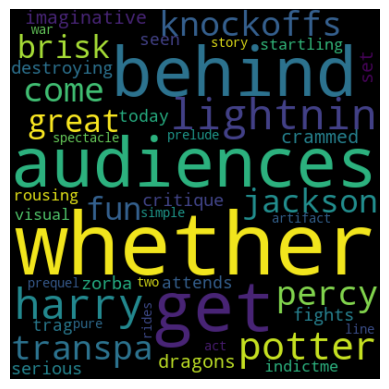

In [64]:
### WC for Genre with str contains
select_genre = str(input('Type :'))
text03 = review_ok[review_ok['genres'].str.contains(select_genre, na=False)]['review_content'] #'''Hola, como estas 19845''' groupby(['first_genre']
text03 = str(text03)
text03 = re.sub(r"\d+","",text03)
tokenizer = nltk.RegexpTokenizer(r"\w+")
nopunc = tokenizer.tokenize(text03)
words03=" ".join(nopunc)
words03= nltk.word_tokenize(words03.lower())
x3 = re.findall("[0-9]+",text03)
stop_words = set(stopwords.words('english'))
stop_words |= set(x3) #add the list with all the numbers in the string to the list of stopwords
stop_words.update({'n', 'name', 'review_content','length', 'dtype', 'object','movie','film','films','th','one','like','sharknado','b',select_genre.lower()})
words = words03

sentence04 = [w for w in words if not w in stop_words]

wordcloud = WordCloud(width=400, height=400, max_font_size=200, min_font_size=10)

sentence1 = sentence04
freq = nltk.FreqDist(sentence1)

wordcloud.generate_from_frequencies(freq)

plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.margins(x=0, y=0)
plt.show()

### To save uncommment
# wordcloud.to_file('N.png')
# plt.savefig('WC-Shawshank.png')

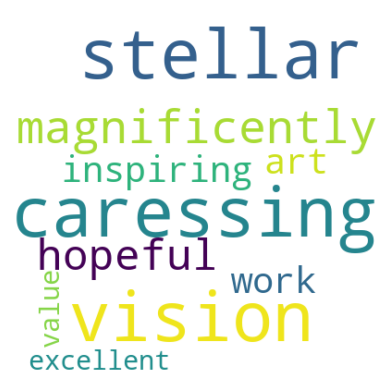

In [65]:
### WC for Movies
select_genre = str(input('Type :'))
text03 = review_ok[review_ok['movie_title'].str.contains(select_genre, na=False)]['review_content'] #'''Hola, como estas 19845''' groupby(['first_genre']
text03 = str(text03)
text03 = re.sub(r"\d+","",text03)
tokenizer = nltk.RegexpTokenizer(r"\w+")
nopunc = tokenizer.tokenize(text03)
words03=" ".join(nopunc)
words03= nltk.word_tokenize(words03.lower())
x3 = re.findall("[0-9]+",text03)
stop_words = set(stopwords.words('english'))
stop_words |= set(x3) #add the list with all the numbers in the string to the list of stopwords
stop_words.update({'n', 'name', 'review_content','length', 'dtype', 'object','movie','film','films','th','one','like','sharknado','b','j','pauses','rapt',
                   'challen','sustain','able','gift','du','creates','teaches','throughout','production',select_genre.lower()})
words = words03

sentence04 = [w for w in words if not w in stop_words]

wordcloud = WordCloud(width=400, height=400,max_words = 10,background_color='white', max_font_size=200, min_font_size=10)

sentence1 = sentence04
freq = nltk.FreqDist(sentence1)

wordcloud.generate_from_frequencies(freq)

plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.margins(x=0, y=0)
plt.show()

#To save uncomment
# wordcloud.to_file('N.png')
# plt.savefig('WC-Shawshank.png')